# Problem Statement
- Build a gesture recognition system using deep learning models such as CNNs and RNNs.
- Apply the system in the context of human-computer interaction or gaming.

Link to data: https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data

## Import Required Libraries and Load Dataset 

In [1]:
import os
import cv2
import numpy as np
import kagglehub
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

Path to dataset files: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1


## Preprocess and Visualize Data

Found subject directory: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapgestrecog/leapGestRecog/03
Found subject directory: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapgestrecog/leapGestRecog/04
Found subject directory: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapgestrecog/leapGestRecog/05
Found subject directory: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapgestrecog/leapGestRecog/02
Found subject directory: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapgestrecog/leapGestRecog/07
Found subject directory: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapgestrecog/leapGestRecog/00
Found subject directory: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapgestrecog/leapGestRecog/09
Found subject directory: /Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/ve

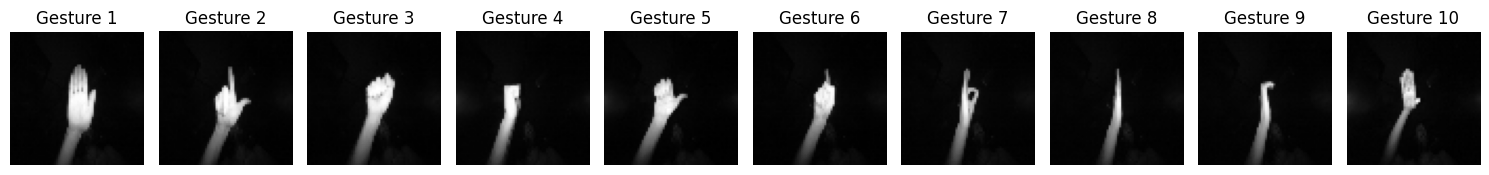

Unique labels: [ 1  2  3  4  5  6  7  8  9 10]
Training data shape: (16000, 64, 64, 1)
Test data shape: (4000, 64, 64, 1)


In [2]:
# Parameters
IMG_SIZE = 64  # Resize images to 64x64 pixels
num_classes = 10  # Number of gesture classes
data = []
labels = []
path = "/Users/gabriel/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1/leapgestrecog/leapGestRecog"

# Collect data
for subject in os.listdir(path):
    subject_path = os.path.join(path, subject)
    if os.path.isdir(subject_path):
        print(f"Found subject directory: {subject_path}")
        for gesture in os.listdir(subject_path):
            gesture_path = os.path.join(subject_path, gesture)
            if os.path.isdir(gesture_path):  # Check if it's a valid gesture folder
                for img_name in os.listdir(gesture_path):
                    img_path = os.path.join(gesture_path, img_name)
                    # Load image in grayscale
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        # Resize the image
                        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                        # Append image and label to the lists
                        data.append(img_resized)
                        # Assuming the gesture folder name follows the pattern '01_palm', '02_l', etc.
                        labels.append(int(gesture.split('_')[0]))  # Use the gesture number as label

# Display one example of each unique gesture
unique_labels = np.unique(labels)
plt.figure(figsize=(15, 3))
for i, label in enumerate(unique_labels):
    # Find first occurrence of each gesture
    idx = labels.index(label)
    plt.subplot(1, len(unique_labels), i + 1)
    plt.imshow(data[idx], cmap='gray')
    plt.title(f"Gesture {label}")
    plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Normalize data (scale pixel values between 0 and 1)
data = data.astype("float32") / 255.0

# Reshape data to add channel dimension (grayscale images have 1 channel)
data = np.expand_dims(data, axis=-1)

print("Unique labels:", np.unique(labels))

# One-hot encode labels
labels = tf.keras.utils.to_categorical(labels-1, num_classes)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

## Create Model

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# Add a convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the previous layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.6650 - loss: 0.9664 - val_accuracy: 0.9980 - val_loss: 0.0113
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9862 - loss: 0.0513 - val_accuracy: 0.9987 - val_loss: 0.0043
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9889 - loss: 0.0355 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9918 - loss: 0.0265 - val_accuracy: 0.9995 - val_loss: 0.0018
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9934 - loss: 0.0190 - val_accuracy: 0.9995 - val_loss: 8.1734e-04
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9950 - loss: 0.0143 - val_accuracy: 0.9998 - val_loss: 5.4889e-04
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9949 - loss: 0

## Evaluate and Visualize Predictions

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9995 - loss: 0.0011
Test accuracy: 0.9998
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


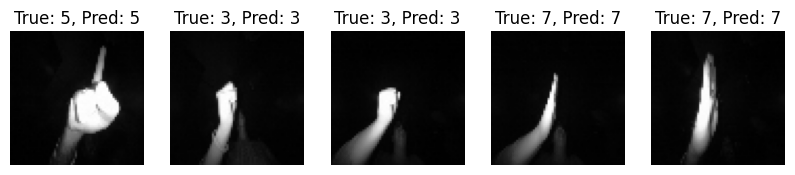

In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test accuracy: {test_acc:.4f}")

import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(X_test)

# Select a random sample of test images to visualize
num_samples = 5
indices = np.random.choice(range(len(X_test)), size=num_samples)

# Visualize the predictions
plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples, i+1)
    
    # Display the image
    plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')  # Reshape to 64x64 for visualization
    plt.axis('off')  # Hide axes
    
    # Get the predicted label (highest probability)
    predicted_label = np.argmax(predictions[idx])
    
    # Get the true label
    true_label = np.argmax(y_test[idx])
    
    # Display the true and predicted labels
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    
plt.show()



## Potential Aplication Demo: Gesture-Based Control

In [ ]:
import cv2
import numpy as np
import mediapipe as mp

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)
mp_draw = mp.solutions.drawing_utils

# List of gesture names based on your dataset labels
gesture_labels = {
    0: 'Palm',
    1: 'Index Up',
    2: 'Fist',
    3: 'Closed Fist',
    4: 'Thumb Up',
    5: 'Index Point',
    6: 'OK Sign',
    7: 'Two Fingers Up',
    8: 'Hook',
    9: 'Claw'
}

def get_hand_bbox(frame, hand_landmarks):
    """Extract bounding box coordinates for the hand"""
    frame_height, frame_width = frame.shape[:2]
    x_coordinates = []
    y_coordinates = []
    
    for landmark in hand_landmarks.landmark:
        x_coordinates.append(int(landmark.x * frame_width))
        y_coordinates.append(int(landmark.y * frame_height))
    
    # Add padding to the bounding box
    padding = 20
    x_min = max(0, min(x_coordinates) - padding)
    y_min = max(0, min(y_coordinates) - padding)
    x_max = min(frame_width, max(x_coordinates) + padding)
    y_max = min(frame_height, max(y_coordinates) + padding)
    
    return x_min, y_min, x_max, y_max

# Webcam capture
cap = cv2.VideoCapture(0)

# Define the target image size for the model
IMG_SIZE = 64

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break
        
    # Convert the BGR image to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Process the frame and detect hands
    results = hands.process(rgb_frame)
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw hand landmarks
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            
            # Get hand bounding box
            x_min, y_min, x_max, y_max = get_hand_bbox(frame, hand_landmarks)
            
            # Extract and process hand region
            hand_region = frame[y_min:y_max, x_min:x_max]
            if hand_region.size > 0:  # Check if hand region is valid
                # Convert to grayscale
                gray_hand = cv2.cvtColor(hand_region, cv2.COLOR_BGR2GRAY)
                
                # Resize to model input size
                img_resized = cv2.resize(gray_hand, (IMG_SIZE, IMG_SIZE))
                
                # Normalize the image
                img_resized = img_resized.astype('float32') / 255.0
                
                # Expand dimensions for model input
                img_expanded = np.expand_dims(img_resized, axis=-1)
                img_expanded = np.expand_dims(img_expanded, axis=0)
                
                # Predict the gesture using the model
                prediction = model.predict(img_expanded)
                predicted_class = np.argmax(prediction)
                gesture_name = gesture_labels.get(predicted_class, "Unknown Gesture")
                
                # Draw bounding box and gesture name
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
                cv2.putText(frame, gesture_name, (x_min, y_min - 10),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Show the resulting frame
    cv2.imshow('Gesture Recognition', frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv2.destroyAllWindows()
hands.close()

I0000 00:00:1740079376.779331 7244899 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1740079376.805597 7251765 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1740079376.815296 7251771 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
2025-02-20 12:22:58.743 Python[70037:7244899] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-20 12:22:58.743 Python[70037:7244899] +[IMKInputSession subclass]: chose IMKInputSession_Modern
W0000 00:00:1740079381.118667 7251768 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━

KeyboardInterrupt: 

: 